In [1]:
# install tensiometer
# install camb
# install getdist
# install cobaya
# install bilby

In [2]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

os.environ['PATH'] = r'/farmdisk1/cosmology/Libraries/texlive/2024/bin/x86_64-linux' #+ os.environ['PATH']
# Enable LaTeX in Matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')
mpl.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % Se necessario
    \newcommand{\sfont}[1]{{\scriptscriptstyle\rm #1}}  % Definizione di \sfont
'''

In [3]:
# initial imports:
import sys, os
import matplotlib.pyplot as plt

# getdist imports:
from getdist import plots, MCSamples

# tensiometer local imports:
here = os.path.dirname(os.getcwd())
tensiometer_path = os.path.join(here, 'tensiometer')
sys.path.append(tensiometer_path)

import tensiometer
print('Tensiometer version:', tensiometer.__version__)
print('Tensiometer path:', tensiometer.__path__)

Tensiometer version: 1.0.2
Tensiometer path: ['/farmdisk1/emaragliano/miniconda3/envs/cobaya_env/lib/python3.10/site-packages/tensiometer']


In [4]:
# chains paths:

chains_dir = os.path.join('chains')

In [5]:
# getdist settings:

getdist_settings = {
    'smooth_scale_1D': 0.3,
    'smooth_scale_2D': 0.4,
    'boundary_correction_order': 1,
    'mult_bias_correction_order': 1,
    }

In [6]:
# import chain from the CMB
from cobaya import load_samples

name = '01p2_LCDM_CMB_PlanckTTTEEE'
chain_PlanckTTTEEE = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_PlanckTTTEEE.label = 'Planck TTTEEE'
chain_PlanckTTTEEE.root = os.path.join(chains_dir, name)
chain_PlanckTTTEEE.updateSettings(getdist_settings)
chain_PlanckTTTEEE.updateBaseStatistics()
chain_PlanckTTTEEE.getConvergeTests()
print(chain_PlanckTTTEEE.label+': R =', round(chain_PlanckTTTEEE.GelmanRubin, 4))

name = '01p3_LCDM_CMB_ACTTTTEEE'
chain_ACTTTTEEE = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_ACTTTTEEE.label = 'ACT TTTEEE'
chain_ACTTTTEEE.root = os.path.join(chains_dir, name)
chain_ACTTTTEEE.updateSettings(getdist_settings)
chain_ACTTTTEEE.updateBaseStatistics()
chain_ACTTTTEEE.getConvergeTests()
print(chain_ACTTTTEEE.label+': R =', round(chain_ACTTTTEEE.GelmanRubin, 4))

name = '01p4_LCDM_CMB_lowl'
chain_CMB_lowl = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_CMB_lowl.label = 'Planck lowl'
chain_CMB_lowl.root = os.path.join(chains_dir, name)
chain_CMB_lowl.updateSettings(getdist_settings)
chain_CMB_lowl.updateBaseStatistics()
chain_CMB_lowl.getConvergeTests()
print(chain_CMB_lowl.label+': R =', round(chain_CMB_lowl.GelmanRubin, 4))

name = '02p2_LCDM_CMB_all'
chain_CMB_all = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_CMB_all.label = 'Planck TTTEEE + ACT TTTEEE + lowl'
chain_CMB_all.root = os.path.join(chains_dir, name)
chain_CMB_all.updateSettings(getdist_settings)
chain_CMB_all.updateBaseStatistics()
chain_CMB_all.getConvergeTests()
print(chain_CMB_all.label+': R =', round(chain_CMB_all.GelmanRubin, 4))

Planck TTTEEE: R = 0.0079
ACT TTTEEE: R = 0.0113
Planck lowl: R = 0.0108
Planck TTTEEE + ACT TTTEEE + lowl: R = 0.0108


In [7]:
#import BAO chain

name = '01p1_LCDM_BAO_DESIDR2'
chain_DESI_DR2 = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_DESI_DR2.label = 'BAO DESI DR2'
chain_DESI_DR2.root = os.path.join(chains_dir, name)
chain_DESI_DR2.updateSettings(getdist_settings)
chain_DESI_DR2.updateBaseStatistics()
chain_DESI_DR2.getConvergeTests()
print(chain_DESI_DR2.label+': R =', round(chain_DESI_DR2.GelmanRubin, 4))


BAO DESI DR2: R = 0.0081


In [8]:
# SN DES Y5

name = '01p5_LCDM_SN_DESY5'
chain_SN_DESY5 = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_SN_DESY5.label = 'SN DES Y5'
chain_SN_DESY5.root = os.path.join(chains_dir, name)
chain_SN_DESY5.updateSettings(getdist_settings)
chain_SN_DESY5.updateBaseStatistics()
chain_SN_DESY5.getConvergeTests()
print(chain_SN_DESY5.label+': R =', round(chain_SN_DESY5.GelmanRubin, 4))


SN DES Y5: R = 0.0098


In [9]:
# CMB + BAO

name = '03p1_LCDM_CMB_BAO'
chain_CMB_BAO = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_CMB_BAO.label = 'CMB + BAO'
chain_CMB_BAO.root = os.path.join(chains_dir, name)
chain_CMB_BAO.updateSettings(getdist_settings)
chain_CMB_BAO.updateBaseStatistics()
chain_CMB_BAO.getConvergeTests()
print(chain_CMB_BAO.label+': R =', round(chain_CMB_BAO.GelmanRubin, 4))


CMB + BAO: R = 0.0074


In [10]:
# CMB + BAO + SN

name = '04p1_LCDM_CMB_BAO_SN'
chain_CMB_BAO_SN = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain_CMB_BAO_SN.label = 'CMB + BAO + SN'
chain_CMB_BAO_SN.root = os.path.join(chains_dir, name)
chain_CMB_BAO_SN.updateSettings(getdist_settings)
chain_CMB_BAO_SN.updateBaseStatistics()
chain_CMB_BAO_SN.getConvergeTests()
print(chain_CMB_BAO_SN.label+': R =', round(chain_CMB_BAO_SN.GelmanRubin, 4))


CMB + BAO + SN: R = 0.0085


In [11]:
chain_PlanckTTTEEE.getParamNames().list()

['H0',
 'logA',
 'ns',
 'ombh2',
 'omch2',
 'tau',
 'A_planck',
 'A',
 'As',
 'DHBBN',
 'YHe',
 'Y_p',
 'age',
 'clamp',
 'omega_de',
 'omegam',
 'omegamh2',
 'rdrag',
 's8h5',
 'S8',
 'S8_optimal',
 's8omegamp25',
 'sigma8',
 'thetastar',
 'zrei',
 'chi2__CMB',
 'minuslogprior',
 'minuslogprior__0',
 'chi2',
 'chi2__act_dr6_cmbonly.PlanckActCut']

All LCDM parameters

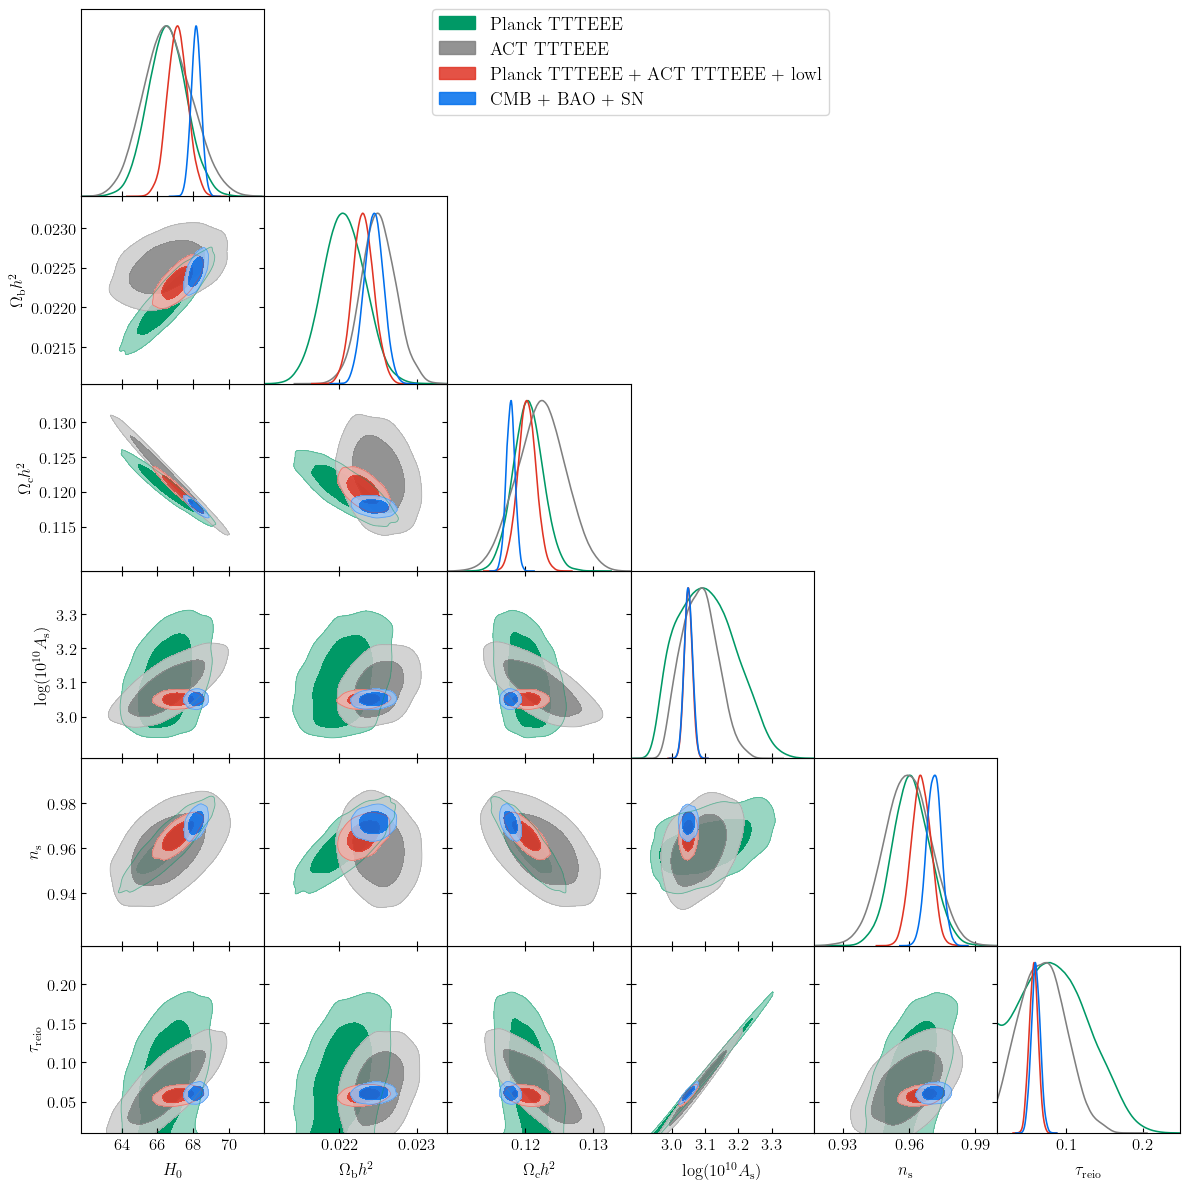

In [12]:
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 15
g.settings.legend_fontsize = 16
g.settings.linewidth = 2.0
g.settings.legend_loc = 'upper right'
getdist_settings['smooth_scale_1D'] = 0.3
getdist_settings['smooth_scale_2D'] = 0.3
chain_PlanckTTTEEE.updateSettings(getdist_settings)
chain_PlanckTTTEEE.updateBaseStatistics()

g.triangle_plot(
    [chain_PlanckTTTEEE, chain_ACTTTTEEE, chain_CMB_all, chain_CMB_BAO_SN],
    params=['H0','ombh2','omch2','logA','ns','tau'],
    filled=True,
)

g.export('plots/LCDM_triangle_plot_all_probes.pdf', dpi=300)

    

In [13]:
#model.__dict__

#BAO only

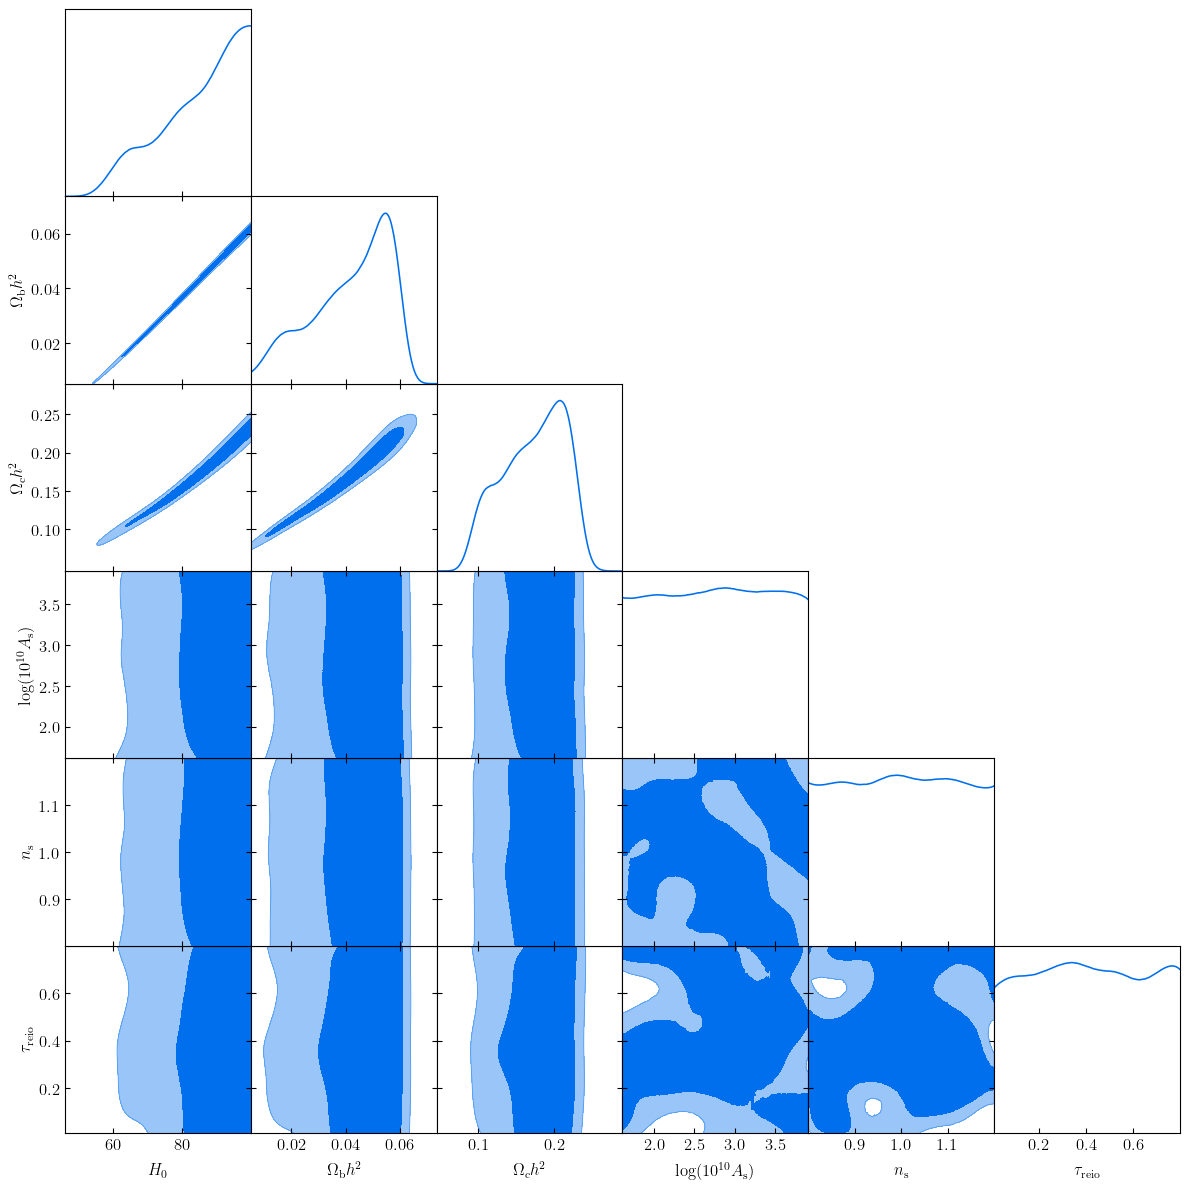

In [14]:
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 15
g.settings.legend_fontsize = 16
g.settings.linewidth = 2.0
g.settings.legend_loc = 'upper right'
getdist_settings['smooth_scale_1D'] = 0.3
getdist_settings['smooth_scale_2D'] = 0.3
chain_PlanckTTTEEE.updateSettings(getdist_settings)
chain_PlanckTTTEEE.updateBaseStatistics()

g.triangle_plot(
    [chain_DESI_DR2],
    params=['H0','ombh2','omch2','logA','ns','tau'],
    filled=True,
)

g.export('plots/LCDM_triangle_plot_all_probes.pdf', dpi=300)

    